In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Open model

In [2]:
with open("rf_model.pkl","rb") as f:
    rf_model = pickle.load(f)

# Load inference data set

In [3]:
X = np.load("inference.npy")
print(X.shape)

(22977621, 6)


# Run deterministic inference

In [4]:
%%time

# Inference
Y = rf_model.predict(X) # Units: m
print(Y.shape)
print(Y.mean())

# # Set values with NaN features to NaN
# indices_nan = np.array([])
# for j in range(0, X.shape[0]):
#     if np.isnan(X[j,:]).any():
#         indices_nan = np.append(indices_nan, j)
#         Y[j] = np.nan

# Save
np.save("2020_Inference_Y.npy", Y)

(22977621,)
0.042711584303944054
CPU times: user 1min 54s, sys: 2.88 s, total: 1min 57s
Wall time: 3.7 s


# Get result from 1 tree

In [5]:
# trees = rf_model.estimators_
# Y = trees[5].predict(X) # Units: m
# np.savetxt("Inference_Y.txt", Y)

# Run ensemble inference

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


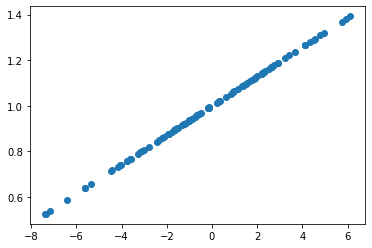

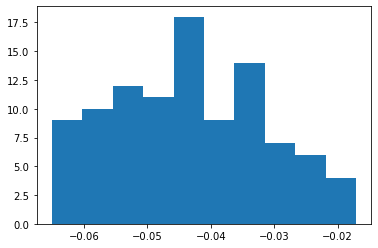

In [6]:
# Number of ensemble members
n = 100
inference_ensemble = np.zeros([X.shape[0], n]); inference_ensemble[:] = np.nan
precip_factor = np.zeros([n]); precip_factor[:] = np.nan
temperature_offset = np.zeros([n]); temperature_offset[:] = np.nan

# Loop over each ensemble member
for j in range(0, n):
    
    # Determine perturbation
    random = np.random.normal(0, 1)
    precip_factor[j] = 1 + (0.2 * random)
    temperature_offset[j] = 3.1 * random
    print(j)
    
    # Apply perurbation
    X_member = np.copy(X)
    X_member[:, 0] += temperature_offset[j]
    X_member[:, 1] = (X[:, 1] * X[:, 0] + temperature_offset[j]) / X_member[:, 0]
    X_member[:, 2] *= precip_factor[j]
    X_member[:, 3] = (X[:, 3] * X[:, 2] * precip_factor[j]) / X_member[:, 2]
    X_member[:, 4] = (X[:, 4] * X[:, 2] * precip_factor[j]) / X_member[:, 2]
    X_member[:, 5] = (X[:, 5] * X[:, 2] * precip_factor[j]) / X_member[:, 2]
    
    # Perform inference
    inference_ensemble[:, j] = rf_model.predict(X_member) # Units: m

# Plot scatter plot of perturbations
plt.figure()
plt.scatter(temperature_offset, precip_factor)

# Plot distribution of solutions
plt.figure()
plt.hist(inference_ensemble[10000000, :])

# Save inference ensemble
np.save("2020_Inference_Y_ensemble.npy", inference_ensemble)